<a href="https://colab.research.google.com/github/ibrahimrehman1/openCV_Tutorial_Google_Colab/blob/main/OpenCV_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

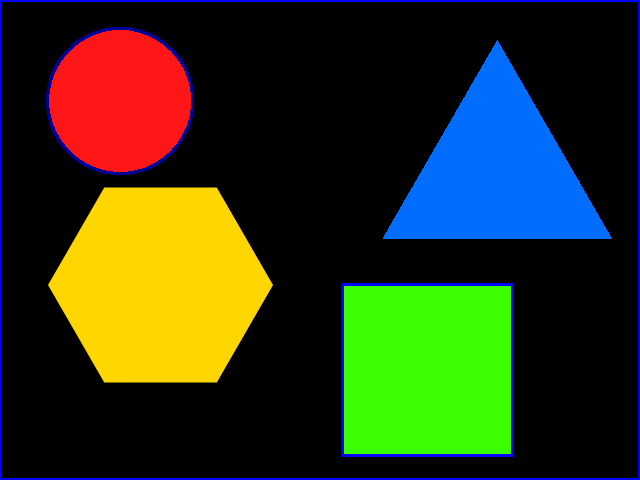

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("./images/shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 50, 255, 1)
contours, h = cv2.findContours(thresh, 1, 2)
for cnt in contours:
  approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
  n = len(approx)

  if (n == 4):
    cv2.drawContours(image, [cnt], 0, 255, 2)

  elif (n == 16):
    cv2.drawContours(image, [cnt], 0, 150, 2)

  elif (n == 3):
    cv2.drawContours(image, [cnt], 0, 0, 2)

cv2_imshow(image)